# Tugas Praktikum

## Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

## Bagian 1: Model K-Means

Pertama, kita akan memuat data dari file CSV dan memilih fitur yang tepat untuk clustering. Umumnya, kita bisa menggunakan fitur seperti Annual Income dan Spending Score untuk melakukan clustering pelanggan.

Kedua, kita perlu menormalkan data agar tidak ada fitur yang mendominasi clustering.

Ketiga, menggunakan metode elbow untuk menentukan jumlah K yang optimal.

Keempat, setelah menemukan jumlah K yang optimal (misalnya, 5), kita bisa membuat model K-Means.

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

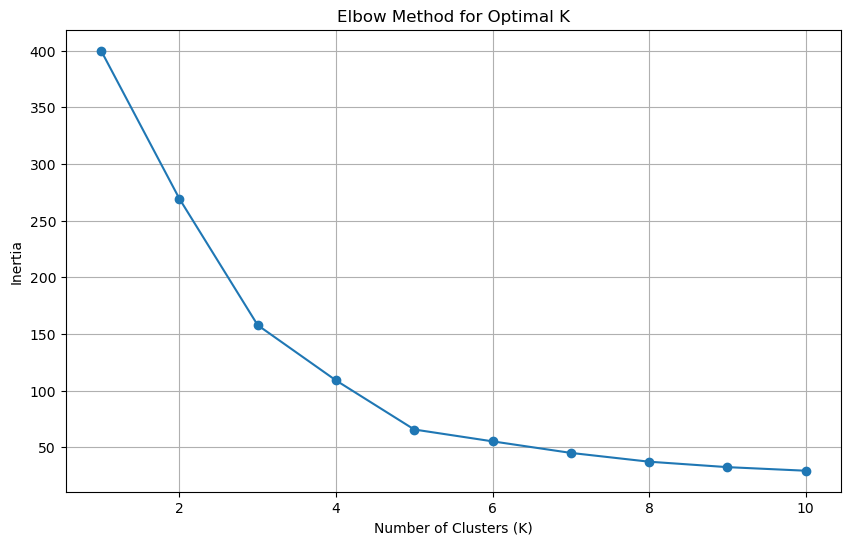

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memuat data
data = pd.read_csv('Mall_Customers.csv')

# Menampilkan 5 baris pertama
print(data.head())

# Memilih fitur yang tepat untuk clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menggunakan Elbow Method untuk menentukan jumlah K yang optimal
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cinthya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


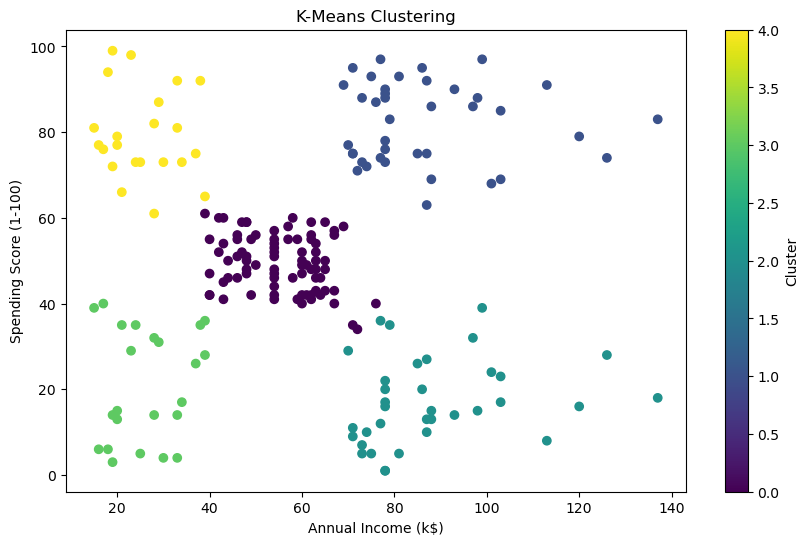

In [5]:
# Membuat model K-Means dengan K optimal
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Menampilkan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

### Bagian 2: Implementasi Model SOM untuk Segmentasi Citra

Untuk menerapkan Self-Organizing Map (SOM) untuk segmentasi citra, kita bisa menggunakan paket MiniSom.

### Instalasi MiniSom

In [6]:
pip install minisom


Note: you may need to restart the kernel to use updated packages.


### Membuat Model SOM

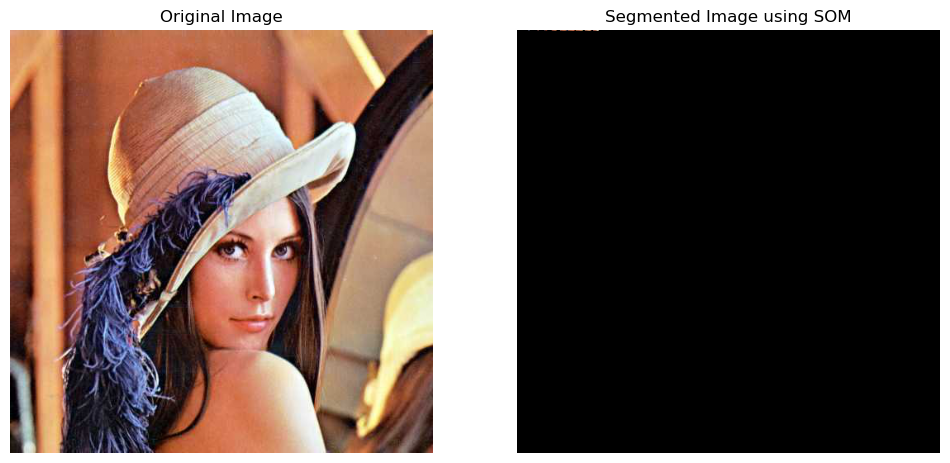

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from minisom import MiniSom

# Membaca citra
image_path = 'lena.jpg'  # Ganti dengan path ke citra Anda
image = io.imread(image_path) / 255.0  # Normalisasi

# Mengubah citra menjadi array 2D (baris x kolom x channel)
image_flat = image.reshape(-1, 3)  # Menggunakan RGB

# Inisialisasi dan melatih SOM
som_size = 10  # Ukuran grid SOM
som = MiniSom(som_size, som_size, 3, sigma=1.0, learning_rate=0.5)
som.train(image_flat, 1000)  # Latih dengan 1000 iterasi

# Mendapatkan output cluster
win_map = som.win_map(image_flat)
clustered_image = np.zeros_like(image_flat)

# Mengisi citra tersegmentasi
for (i, j), values in win_map.items():
    clustered_image[i * som_size + j] = np.mean(values, axis=0)

# Mengembalikan ke bentuk gambar asli
clustered_image = clustered_image.reshape(image.shape)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image using SOM')
plt.imshow(clustered_image)
plt.axis('off')

plt.show()